# Data preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from regression_utils import * 

import os
%matplotlib inline

In [2]:
# load data 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

| Metric | Explanation | <br>
| :- | :- | :- |
| country | name of the country  <br> 
|year      | time period of data collection <br> 
|status    | developed or developing <br> 
|life_expectancy | life expectancy for a particular year <br> 
|adult_mortality | number of deaths (aged 15-60) per 1000 people <br> 
|infant_death | number of infant deaths per 1000 <br> 
|alcohol | country's alcohol consumption measured as litres consumer per capita <br> 
|%_expenditure | health expenditure as percentage of GDP <br> 
|hepatitis_b | # of 1 year olds with hepatitis B immunization / total # of 1 year old <br> 
|measles | # of measles cases reported per 1000 <br> 
|bmi | average bmi of population <br> 
|under_5_death | # of deaths for < 5 year olds per 1000 <br> 
|polio | # of 1 year olds with polio immunization / total # of 1 year old <br> 
|total_expenditure | government health expenditure / total government expenditure <br> 
|diphtheria | # of 1 year olds with diphtheria immunization / total # of 1 year old <br> 
|hiv_aids | # of people under 5 who die due to hiv/aids per 1000 births <br> 
|gdp | gdp per capita <br> 
|population | population <br> 
|thinness_10-19_years | # of thin people aged 10-19 per 1000 people <br> 
|thinness_5-9_years | # of thin people aged 5-9 per 1000 people <br> 
|income_composition_of_resources | HDI in terms of income composition <br>
|schooling | average number of years of school attendance 

In [4]:
# renaming the columns by removing additional spaces 
df.rename(columns = lambda x: x.strip().replace(' ', '_').lower(), inplace=True)

# renaming the column appropriately 
df.rename(columns = {'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [5]:
# computing the total number of NaN entries 
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [6]:
# visualize the distributions of continuous variables
num_cols = ['life_expectancy', 'year', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

na_cols = ['life_expectancy', 'year', 'adult_mortality', 'alcohol', 'hepatitis_b',
       'bmi', 'polio', 'total_expenditure','diphtheria', 'gdp', 'population', 
        'thinness_10-19_years', 'thinness_5-9_years', 
        'income_composition_of_resources', 'schooling']

In [7]:
# replace NaN by mean 
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

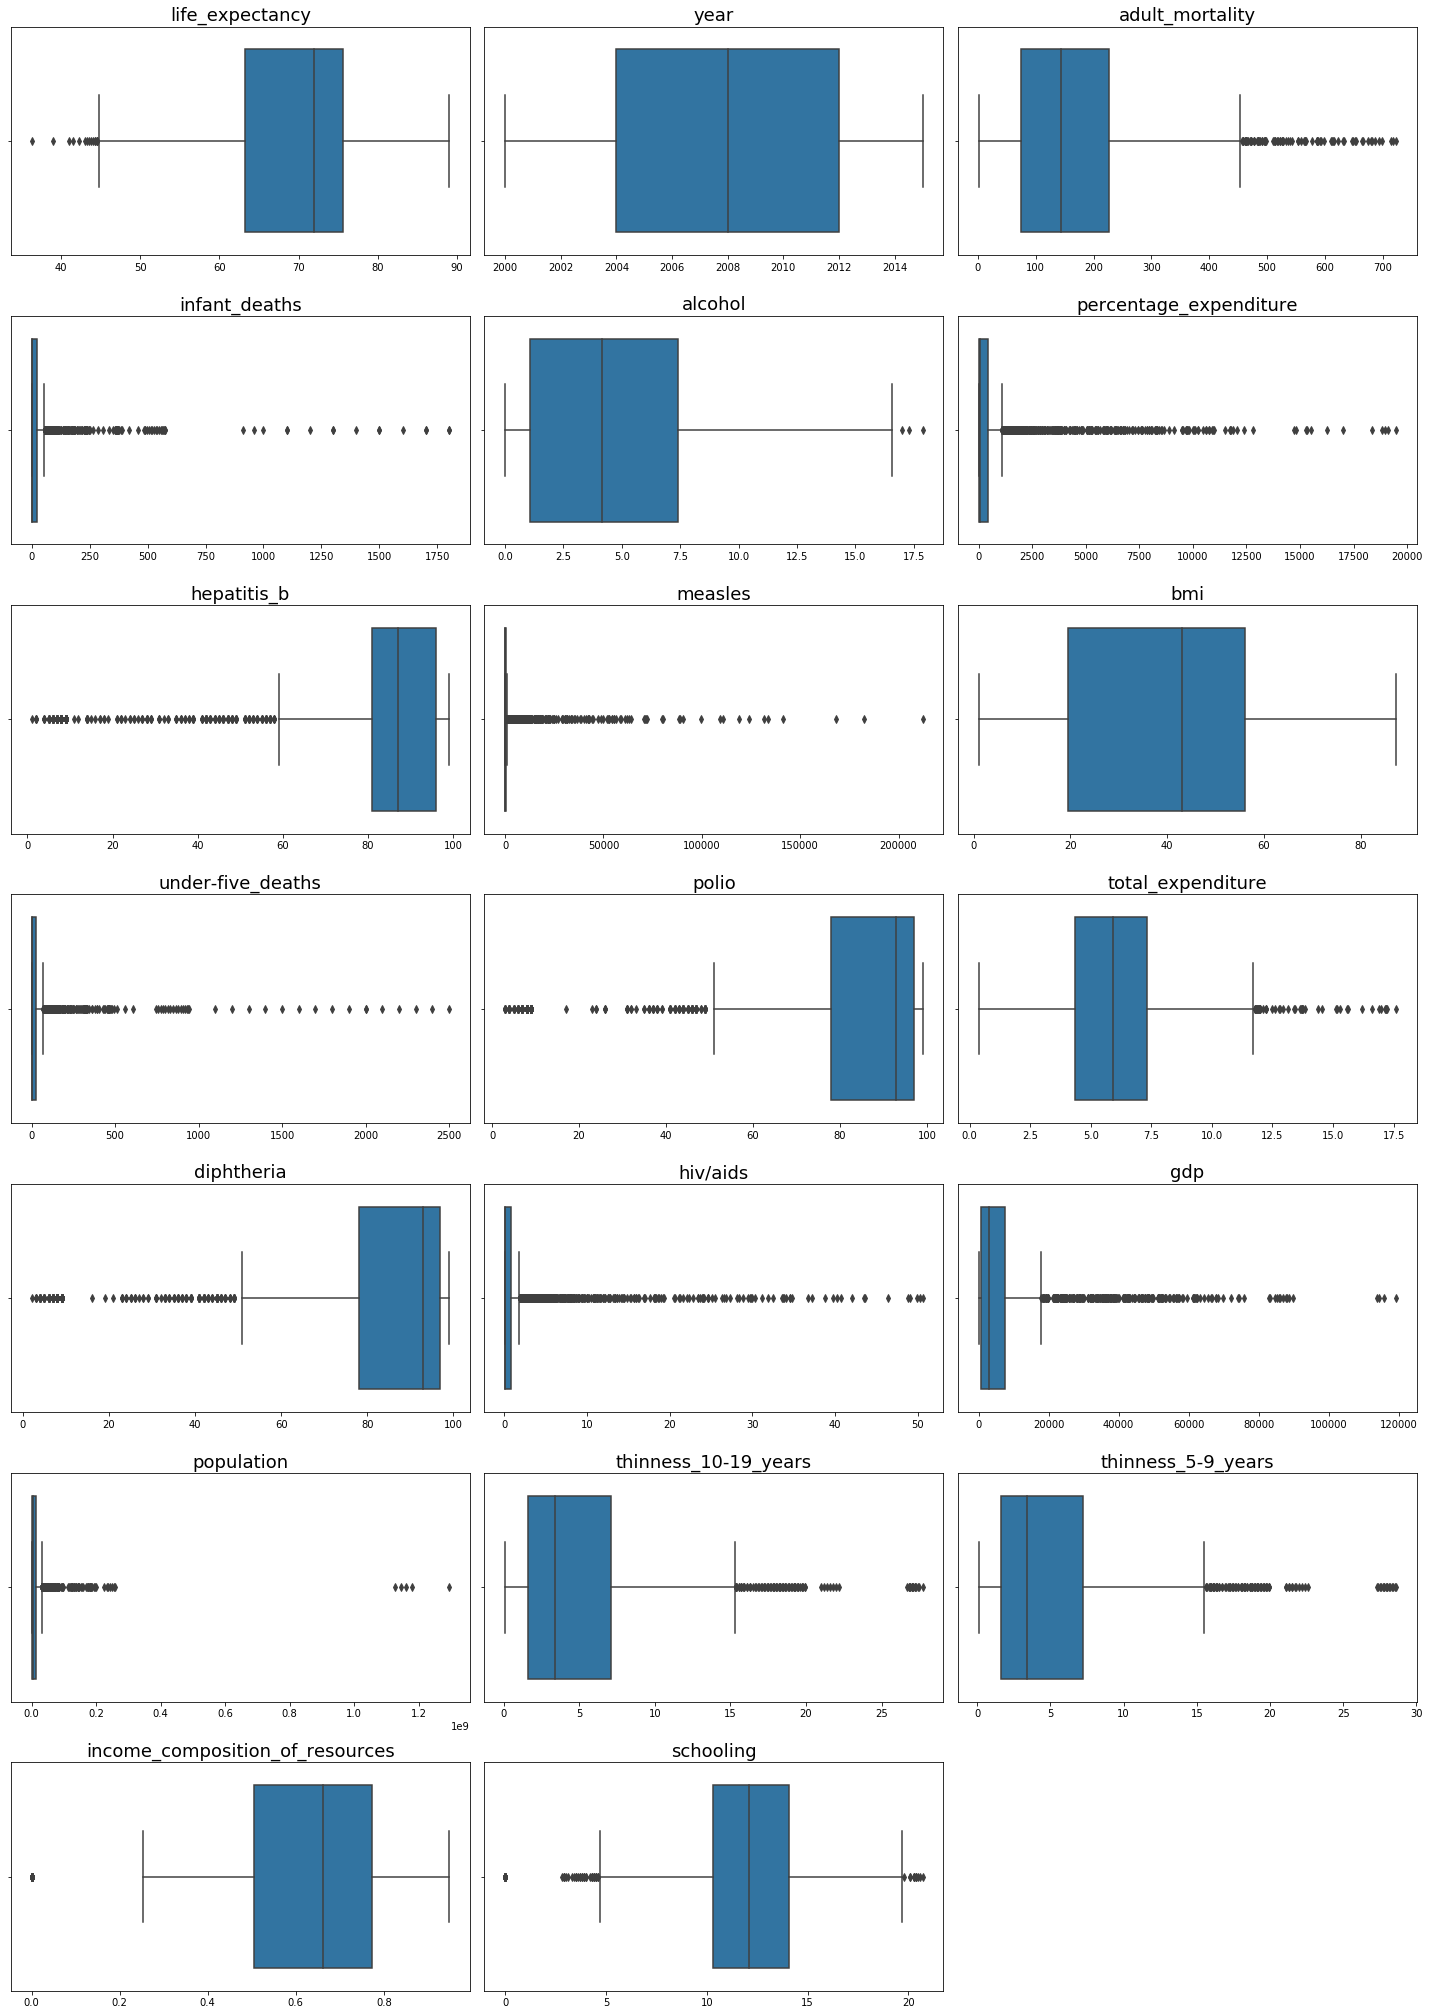

In [8]:
# visualizing outliers via boxplot
plt.figure(figsize=(20,60))

for i, col in enumerate(num_cols):
    plt.subplot(len(na_cols), 3, i+1)
    sns.boxplot(df[col])
    plt.title(f'{col}', fontsize=18)
    plt.xlabel('')

plt.tight_layout()
plt.show()

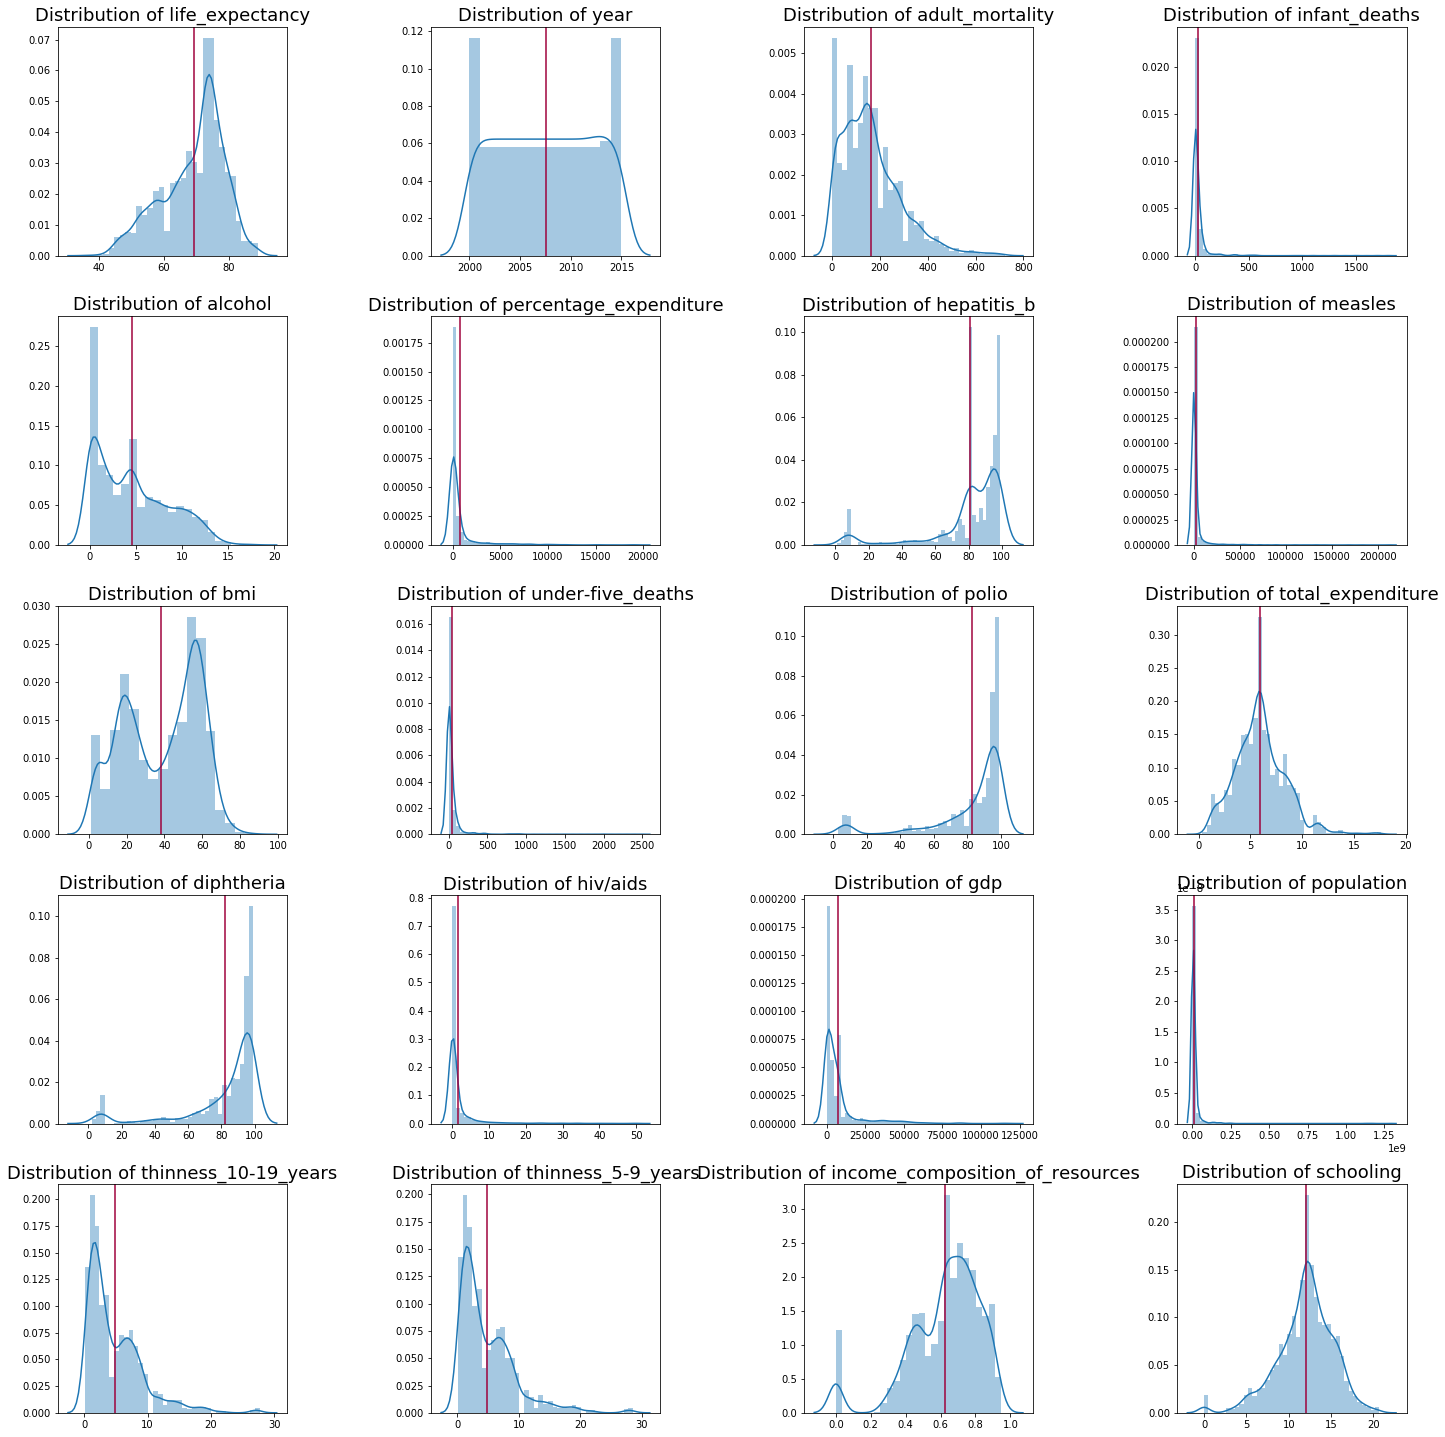

In [9]:
# visualizing boxplots via histograms 
plt.figure(figsize=(20,60))

for i, col in enumerate(num_cols):
    plt.subplot(len(na_cols), 4, i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}', fontsize=18)
    plt.xlabel('')
    plt.axvline(df.loc[:,col].mean(), color=('xkcd:cranberry')) #red line is the mean

plt.tight_layout()
plt.show()

In [10]:
# quantitative analysis of dataset 
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Observations from the boxplots, histograms and quantitative analysis: <br> 
<br>
(i) **infant deaths exceeed 1000:** violates the definition of the metric <br> 
(ii) **measles** : violates the definition of the metric (can not exceed 1000) <br> 
(iii) **under_five_deaths** : violates the definition of the metric (can not exceed 1000) <br> 
(iv) **bmi** : can not practically exceed 50 or be as low as 1  <br> 
(v) **gdp** : cant be as low as $1 <br>

# Country specific analysis

In [11]:
df.columns 

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [12]:
country = 'Germany'
df.rename(columns = {'country':'Country'}, inplace = True) 
countryDataFrame = countryDF('Germany',df)
print(type(countryDataFrame))
df.rename(columns = {'Country':'country'}, inplace = True)

<class 'pandas.core.frame.DataFrame'>


In [13]:
countryDataFrame.columns

Index(['Country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [14]:
countryDataFrame

%store countryDataFrame

Stored 'countryDataFrame' (DataFrame)


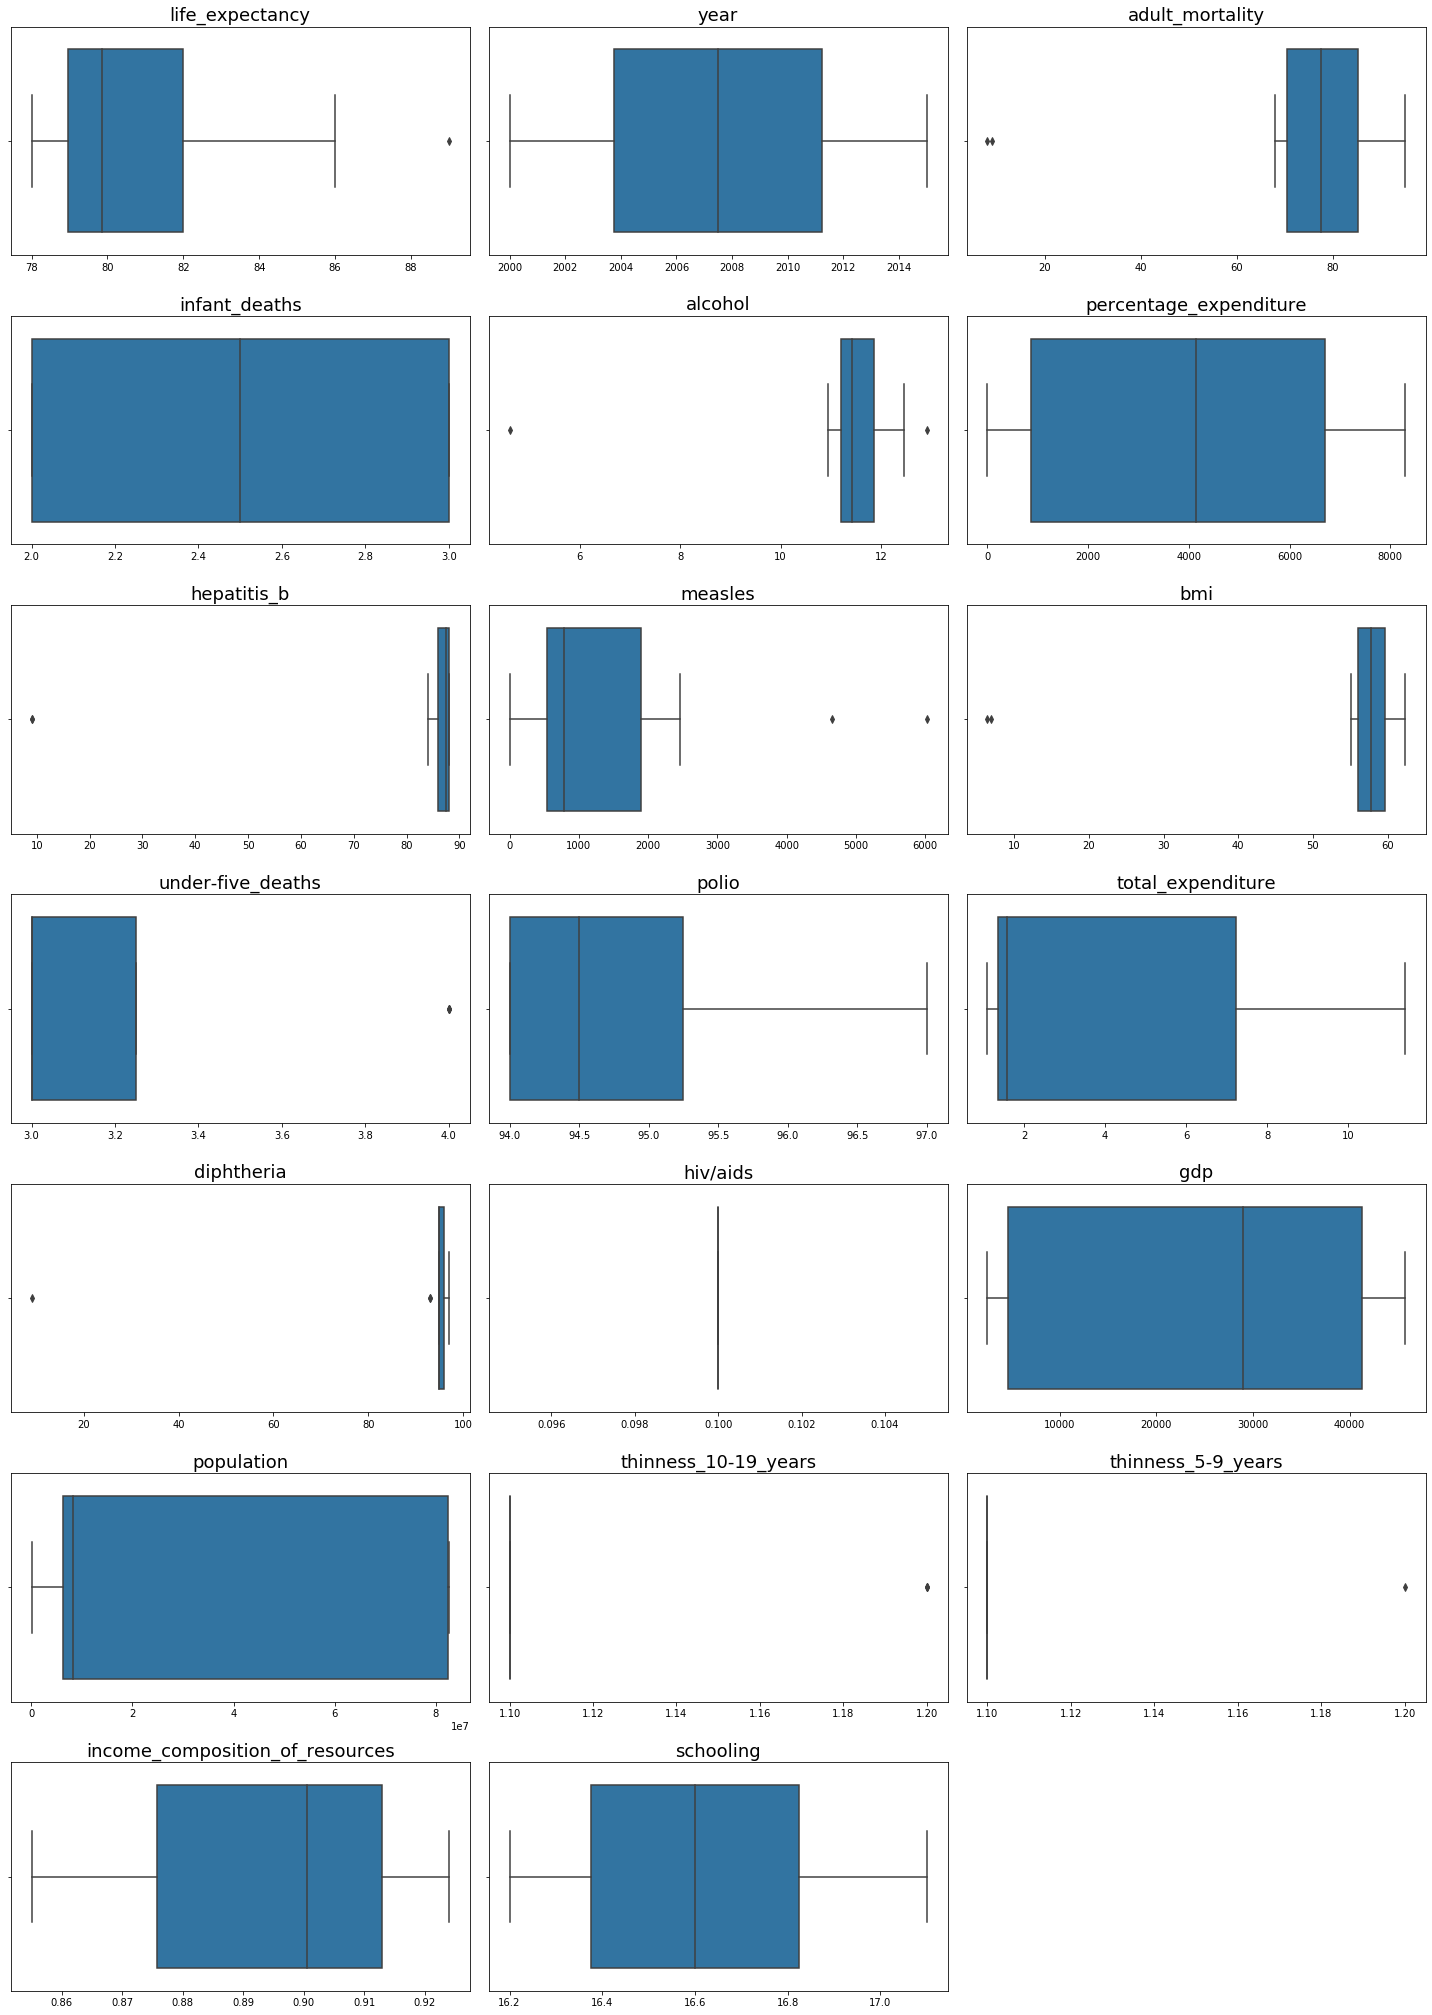

In [15]:
# visualizing outliers via boxplot
plt.figure(figsize=(20,60))

for i, col in enumerate(num_cols):
    plt.subplot(len(na_cols), 3, i+1)
    sns.boxplot(countryDataFrame[col])
    plt.title(f'{col}', fontsize=18)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [16]:
countryDataFrame

,Country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
994,Germany,2015,Developed,81.0,68.0,2,4.602861,0.000000,88.0,2464,...,94.0,5.93819,95.0,0.1,41176.88158,81686611.0,1.1,1.1,0.924,17.1
995,Germany,2014,Developed,89.0,69.0,2,11.030000,941.756291,88.0,443,...,94.0,11.30000,95.0,0.1,4792.65288,89825.0,1.1,1.1,0.920,17.0
996,Germany,2013,Developed,86.0,71.0,2,10.940000,895.877950,88.0,1771,...,94.0,11.16000,95.0,0.1,4653.91143,864565.0,1.1,1.1,0.919,16.9
997,Germany,2012,Developed,86.0,71.0,2,11.180000,839.913320,88.0,166,...,94.0,1.99000,95.0,0.1,4465.24891,8425823.0,1.1,1.1,0.916,16.9
998,Germany,2011,Developed,85.0,74.0,2,11.200000,869.790735,88.0,1607,...,94.0,1.93000,95.0,0.1,4681.32796,8274983.0,1.1,1.1,0.912,16.8
999,Germany,2010,Developed,81.0,76.0,2,11.200000,7584.078579,88.0,780,...,94.0,11.25000,95.0,0.1,41785.55691,8177693.0,1.1,1.1,0.907,16.7
1000,Germany,2009,Developed,80.0,79.0,2,11.220000,7641.270645,88.0,574,...,95.0,11.40000,96.0,0.1,41732.77250,819237.0,1.1,1.1,0.906,16.7
1001,Germany,2008,Developed,79.9,8.0,2,11.360000,8285.264655,87.0,917,...,95.0,1.39000,96.0,0.1,45699.19832,821197.0,1.1,1.1,0.903,16.6
1002,Germany,2007,Developed,79.8,82.0,3,11.500000,7777.556353,86.0,567,...,95.0,1.18000,96.0,0.1,41814.81910,82266372.0,1.1,1.1,0.898,16.6
1003,Germany,2006,Developed,79.6,84.0,3,11.760000,6407.535954,87.0,2307,...,94.0,1.34000,96.0,0.1,36447.87232,82376451.0,1.1,1.1,0.892,16.5


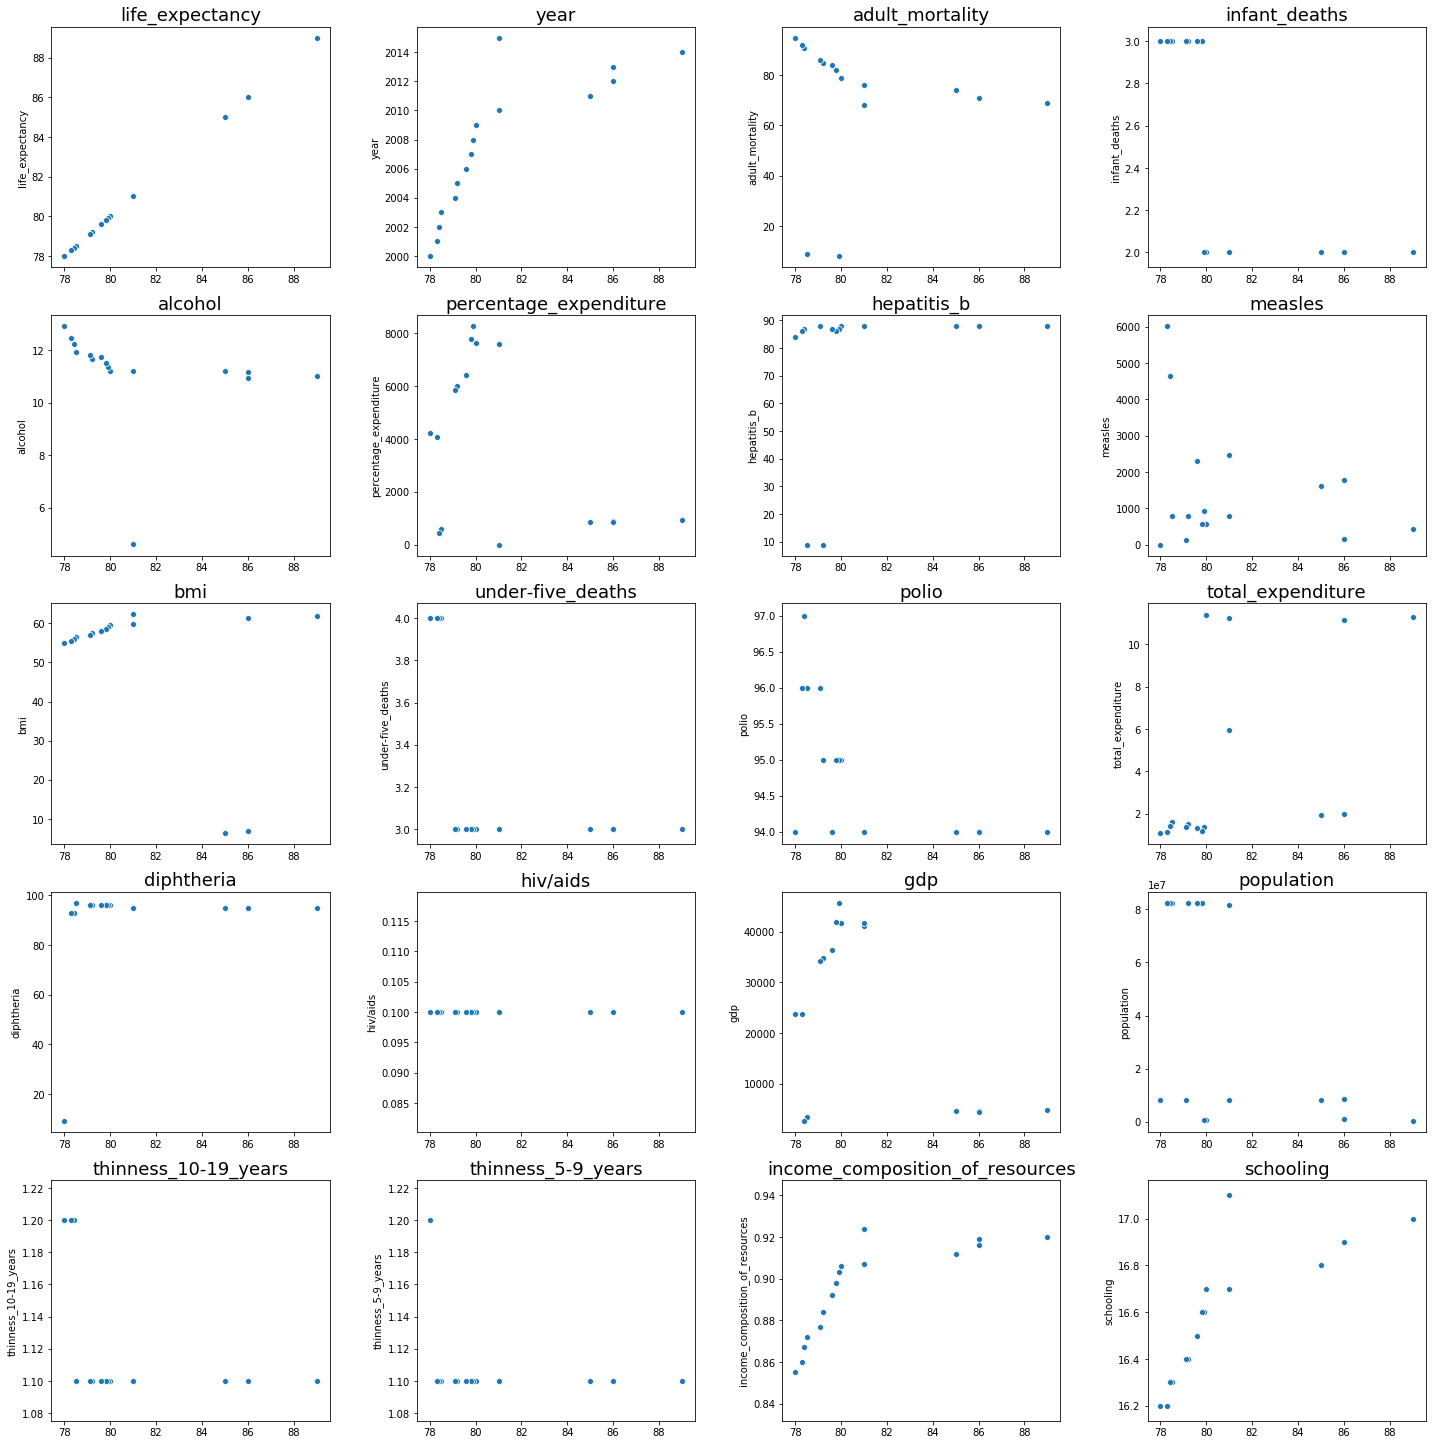

In [17]:
# visualizing variation in quantities via line plot
plt.figure(figsize=(20,60))

for i, col in enumerate(num_cols):
    plt.subplot(len(na_cols), 4, i+1)
    sns.scatterplot(countryDataFrame['life_expectancy'],countryDataFrame[col])
    plt.title(f'{col}', fontsize=18)
    plt.xlabel('')

plt.tight_layout()
plt.show()